In [4]:
import brewer2mpl
!pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.spatial.distance as distance
import scipy.cluster.hierarchy as sch

%matplotlib inline  
np.random.seed(5)

In [5]:
# font size for figures
matplotlib.rcParams.update({'font.size': 16})
# Arial font
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

In [6]:
# helper for cleaning up axes by removing ticks, tick labels, frame, etc.
def clean_axis(ax):
    """Remove ticks, tick labels, and frame from axis"""
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for sp in ax.spines.values():
        sp.set_visible(False)

In [7]:
# test data
testL = []
# 5 samples from one group
for i in range(5):
    # 20 measurements from normal with mean 10, stdev 2
    testL.append(np.random.normal(10,2,20))
# 8 samples from another group
for i in range(8):
    # 20 measurements from normal with mean 4, stdev 4
    testL.append(np.random.normal(4,4,20))

In [9]:
#print testL
# permute test data and make dataframe
testA = np.array(testL)[np.random.permutation(range(len(testL)))]
testDF = pd.DataFrame(testA)

/Users/pgreisen/anaconda2/lib/python2.7/site-packages/matplotlib/artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


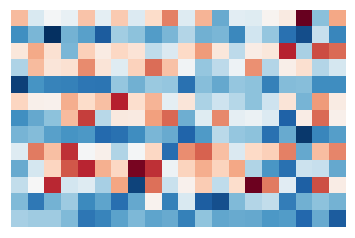

In [12]:
testDF.shape
# print testDF
# matrix with values
# look at raw data
axi = plt.imshow(testDF,interpolation='nearest',cmap=matplotlib.cm.RdBu)
ax = axi.get_axes()
clean_axis(ax)

In [13]:
# calculate pairwise distances for rows
pairwise_dists = distance.squareform(distance.pdist(testDF))
print 'Number of rows: {0}'.format(testDF.shape[0])
print 'Size of distance matrix: {0}'.format(pairwise_dists.shape)

Number of rows: 13
Size of distance matrix: (13, 13)


In [14]:
# cluster
clusters = sch.linkage(pairwise_dists,method='complete')

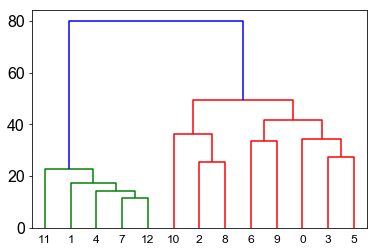

In [15]:
# dendrogram
den = sch.dendrogram(clusters)

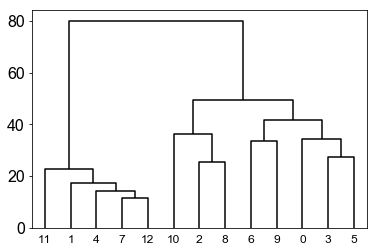

In [16]:
# make dendrograms black rather than letting scipy color them
sch.set_link_color_palette(['black'])
# or 
den = sch.dendrogram(clusters,color_threshold=np.inf)

In [17]:
# dendrogram without plot
den = sch.dendrogram(clusters,color_threshold=np.inf,no_plot=True)

In [18]:
den['leaves']

[11, 1, 4, 7, 12, 10, 2, 8, 6, 9, 0, 3, 5]

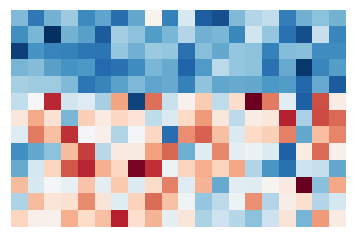

In [19]:
axi = plt.imshow(testDF.ix[den['leaves']],interpolation='nearest',cmap=matplotlib.cm.RdBu)
ax = axi.get_axes()
clean_axis(ax)

In [20]:
fig = plt.figure()
heatmapGS = gridspec.GridSpec(1,2,wspace=0.0,hspace=0.0,width_ratios=[0.25,1])

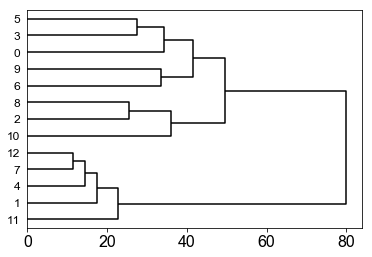

In [21]:
### row dendrogram ###
denAX = fig.add_subplot(heatmapGS[0,0])
denD = sch.dendrogram(clusters,color_threshold=np.inf,orientation='right')
clean_axis(denAX)

In [22]:
### heatmap ###
heatmapAX = fig.add_subplot(heatmapGS[0,1])
axi = heatmapAX.imshow(testDF.ix[den['leaves']],interpolation='nearest',aspect='auto',origin='lower',cmap=matplotlib.cm.RdBu)
clean_axis(heatmapAX)

In [40]:
# rename row clusters
row_clusters = clusters
# calculate pairwise distances for columns
col_pairwise_dists = distance.squareform(distance.pdist(testDF.T))
# cluster
col_clusters = sch.linkage(col_pairwise_dists,method='complete')


[[  1.          10.          16.01038092   2.        ]
 [ 15.          19.          16.66735436   2.        ]
 [  5.          13.          18.88195351   2.        ]
 [  2.          20.          19.27789777   3.        ]
 [ 11.          23.          19.76247617   4.        ]
 [  3.           8.          20.2772304    2.        ]
 [  4.           7.          20.90538615   2.        ]
 [  0.          16.          22.05145025   2.        ]
 [ 21.          24.          23.54954231   6.        ]
 [  6.          22.          23.59994024   3.        ]
 [ 14.          18.          24.06229643   2.        ]
 [ 12.          29.          25.47126568   4.        ]
 [  9.          17.          26.10232997   2.        ]
 [ 25.          26.          29.59004236   4.        ]
 [ 28.          30.          29.59563096   8.        ]
 [ 31.          33.          31.26286574   8.        ]
 [ 27.          34.          32.70786195  10.        ]
 [ 32.          35.          43.94991066  10.        ]
 [ 36.    

                        cc0        cc1        cc2        cc3        cc4  \
Sample Sample 11   9.128592  11.944359   9.518578   8.351753  11.136265   
Sample Sample 1   10.882455   9.338260  14.861542   9.495816  10.219220   
Sample Sample 4   14.177029  10.693839  11.491454  11.553815  12.036842   
Sample Sample 7    9.388294   9.044537  10.201476  10.710877  10.539225   
Sample Sample 12   8.038784   8.286294   8.256242   9.154984  11.992880   
Sample Sample 10   7.169690   4.683058  -3.014963   6.521186   5.993317   
Sample Sample 2    3.509880   0.769028   3.069775   9.340601   2.214173   
Sample Sample 8    5.998472  -0.606177   1.557934  -2.815542   4.777750   
Sample Sample 6   10.953795   9.860820   8.849134   1.461390  -2.398794   
Sample Sample 9    9.802934   6.427481   2.497517  -1.687698  -3.124605   
Sample Sample 0    1.414574   6.194271   4.842170   5.386007   1.731795   
Sample Sample 3    7.825047   1.445958   3.427494   3.103241  -0.153981   
Sample Sample 5    2.4971

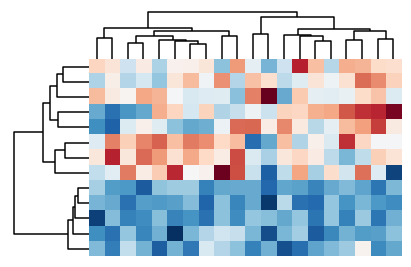

In [43]:
# plot the results
fig = plt.figure()
heatmapGS = gridspec.GridSpec(2,2,wspace=0.0,hspace=0.0,width_ratios=[0.25,1],height_ratios=[0.25,1])

### col dendrogram ####
col_denAX = fig.add_subplot(heatmapGS[0,1])
col_denD = sch.dendrogram(col_clusters,color_threshold=np.inf)
clean_axis(col_denAX)

### row dendrogram ###
row_denAX = fig.add_subplot(heatmapGS[1,0])
row_denD = sch.dendrogram(row_clusters,color_threshold=np.inf,orientation='left')
clean_axis(row_denAX)

### heatmap ###
heatmapAX = fig.add_subplot(heatmapGS[1,1])
axi = heatmapAX.imshow(testDF.ix[den['leaves'],col_denD['leaves']],interpolation='nearest',aspect='auto',origin='lower',cmap=matplotlib.cm.RdBu)
clean_axis(heatmapAX)

fig.tight_layout()

In [36]:
testDF.index = [ 'Sample ' + str(x) for x in testDF.index ]
testDF.columns = [ 'c' + str(x) for x in testDF.columns ]
testDF.columns

Index([u'cc0', u'cc1', u'cc2', u'cc3', u'cc4', u'cc5', u'cc6', u'cc7', u'cc8',
       u'cc9', u'cc10', u'cc11', u'cc12', u'cc13', u'cc14', u'cc15', u'cc16',
       u'cc17', u'cc18', u'cc19'],
      dtype='object')

In [27]:
testDF.index[row_denD['leaves']]

Index([u'Sample 11', u'Sample 1', u'Sample 4', u'Sample 7', u'Sample 12',
       u'Sample 10', u'Sample 2', u'Sample 8', u'Sample 6', u'Sample 9',
       u'Sample 0', u'Sample 3', u'Sample 5'],
      dtype='object')

In [44]:
heatmapAX.yaxis.set_ticks_position('right')

In [45]:
from pylab import *
heatmapAX.set_yticks(arange(testDF.shape[0]))

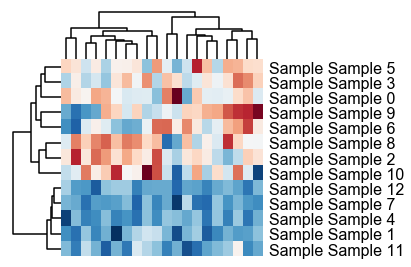

In [47]:
# heatmap with row names
fig = plt.figure()
heatmapGS = gridspec.GridSpec(2,2,wspace=0.0,hspace=0.0,width_ratios=[0.25,1],height_ratios=[0.25,1])

### col dendrogram ###
col_denAX = fig.add_subplot(heatmapGS[0,1])
col_denD = sch.dendrogram(col_clusters,color_threshold=np.inf)
clean_axis(col_denAX)

### row dendrogram ###
row_denAX = fig.add_subplot(heatmapGS[1,0])
row_denD = sch.dendrogram(row_clusters,color_threshold=np.inf,orientation='left')
clean_axis(row_denAX)

### heatmap ###
heatmapAX = fig.add_subplot(heatmapGS[1,1])
axi = heatmapAX.imshow(testDF.ix[den['leaves'],col_denD['leaves']],interpolation='nearest',aspect='auto',origin='lower',cmap=matplotlib.cm.RdBu)
clean_axis(heatmapAX)

## row labels ##
heatmapAX.set_yticks(np.arange(testDF.shape[0]))
heatmapAX.yaxis.set_ticks_position('right')
heatmapAX.set_yticklabels(testDF.index[row_denD['leaves']])
# remove the tick lines - line near text
for l in heatmapAX.get_xticklines() + heatmapAX.get_yticklines(): 
    l.set_markersize(0)

fig.tight_layout()

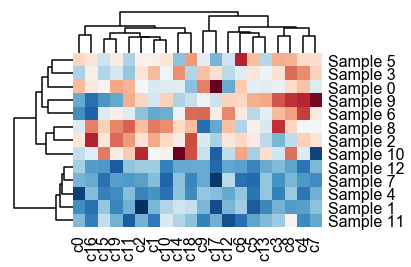

In [35]:
# heatmap with row names
fig = plt.figure()
heatmapGS = gridspec.GridSpec(2,2,wspace=0.0,hspace=0.0,width_ratios=[0.25,1],height_ratios=[0.25,1])

### col dendrogram ###
col_denAX = fig.add_subplot(heatmapGS[0,1])
col_denD = sch.dendrogram(col_clusters,color_threshold=np.inf)
clean_axis(col_denAX)

### row dendrogram ###
row_denAX = fig.add_subplot(heatmapGS[1,0])
row_denD = sch.dendrogram(row_clusters,color_threshold=np.inf,orientation='left')
clean_axis(row_denAX)

### heatmap ####
heatmapAX = fig.add_subplot(heatmapGS[1,1])
axi = heatmapAX.imshow(testDF.ix[row_denD['leaves'],col_denD['leaves']],interpolation='nearest',aspect='auto',origin='lower',cmap=matplotlib.cm.RdBu)
clean_axis(heatmapAX)

## row labels ##
heatmapAX.set_yticks(np.arange(testDF.shape[0]))
heatmapAX.yaxis.set_ticks_position('right')
heatmapAX.set_yticklabels(testDF.index[row_denD['leaves']])

## col labels ##
heatmapAX.set_xticks(np.arange(testDF.shape[1]))
xlabelsL = heatmapAX.set_xticklabels(testDF.columns[col_denD['leaves']])
# rotate labels 90 degrees
for label in xlabelsL:
    label.set_rotation(90)
# remove the tick lines
for l in heatmapAX.get_xticklines() + heatmapAX.get_yticklines(): 
    l.set_markersize(0)

fig.tight_layout()